## **Predictive Modelling**
          
### **Predictive Modelling involves six different stages**
#### 1. Problem Definition
#### 2. Hypothesis Generation
#### 3. Data Extraction or collection
#### 4. Data Exploration and Transformation
#### 5. Model Building
#### 6. Model Deployment and Implementation

### **Players Data** :

**nflId** : Player recognizable proof number, interesting over players (numeric)

**height** : Player stature (text)

**weight**: Player weight (numeric)

**birthDate**: Date of birth (YYYY-MM-DD)

**collegeName**: Player college (text)

**position**: Official player position (text)

**displayName**: Player title (content)

In [1]:
#Import library to run the task

import pandas as pd  #Pandas is a analysis of data in terms of rows and columns library for Python.

import matplotlib.pyplot as plt  #Matplotlib is a plotting library for Python.

import seaborn as sns  #Seaborn is a plotting library for Python and it visualize more effective way from matplotlib.

# <center>**Players Data**</center>

In [2]:
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/players.csv")  #read player data csv file 

players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [3]:
players.info()  #It will show the information about column, null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [4]:
nflplayer = players.copy()  #Copy players dataframe and store it into nflplayer variable

In [5]:
nflplayer.count()  #Display the count of each column

nflId          1683
height         1683
weight         1683
birthDate      1204
collegeName    1683
position       1683
displayName    1683
dtype: int64

In [6]:
nflplayer.nunique()  #Display the unique count of each column

nflId          1683
height           16
weight          179
birthDate       985
collegeName     226
position         19
displayName    1672
dtype: int64

In [7]:
# Convert height to cm

def convert_height_to_cm(height):
    
    feet, inches = height.split('-')
    
    height_in_cm = (int(feet) * 30.48) + (int(inches) * 2.54)
    
    return height_in_cm

nflplayer['height_in_cm'] = nflplayer['height'].apply(convert_height_to_cm)  # apply the function to each row of the dataframe

nflplayer[['height_in_cm']] = nflplayer[['height_in_cm']].astype(int)  # print the resulting dataframe


In [8]:
nflplayers = nflplayer.drop('height', axis=1)

nflplayers

,nflId,weight,birthDate,collegeName,position,displayName,height_in_cm
0,25511,225,1977-08-03,Michigan,QB,Tom Brady,193
1,29550,328,1982-01-22,Arkansas,T,Jason Peters,193
2,29851,225,1983-12-02,California,QB,Aaron Rodgers,187
3,30842,267,1984-05-19,UCLA,TE,Marcedes Lewis,198
4,33084,217,1985-05-17,Boston College,QB,Matt Ryan,193
...,...,...,...,...,...,...,...
1678,55200,266,NaN,Indiana,DT,Ryder Anderson,198
1679,55212,230,NaN,Iowa State,ILB,Jake Hummel,182
1680,55239,300,NaN,Pennsylvania,DT,Prince Emili,187
1681,55240,185,NaN,Buffalo,CB,Ja'Marcus Ingram,185


In [9]:
# Convert the 'Date' column to datetime type

nflplayers['birthDate'] = pd.to_datetime(nflplayers['birthDate'], errors='coerce')

In [10]:
from datetime import datetime #import datetime module

birth_year = nflplayers['birthDate'].dt.year  # Convert the 'Date' column to month

nflplayers['player_age'] = datetime.now().year - birth_year  #calculate age from current year to birth year

In [11]:
nflplayers['player_age'].fillna(0.0, inplace=True)

nflplayers['player_age'] = nflplayers['player_age'].astype(int)

In [12]:
nflplayers

,nflId,weight,birthDate,collegeName,position,displayName,height_in_cm,player_age
0,25511,225,1977-08-03,Michigan,QB,Tom Brady,193,47
1,29550,328,1982-01-22,Arkansas,T,Jason Peters,193,42
2,29851,225,1983-12-02,California,QB,Aaron Rodgers,187,41
3,30842,267,1984-05-19,UCLA,TE,Marcedes Lewis,198,40
4,33084,217,1985-05-17,Boston College,QB,Matt Ryan,193,39
...,...,...,...,...,...,...,...,...
1678,55200,266,NaT,Indiana,DT,Ryder Anderson,198,0
1679,55212,230,NaT,Iowa State,ILB,Jake Hummel,182,0
1680,55239,300,NaT,Pennsylvania,DT,Prince Emili,187,0
1681,55240,185,NaT,Buffalo,CB,Ja'Marcus Ingram,185,0


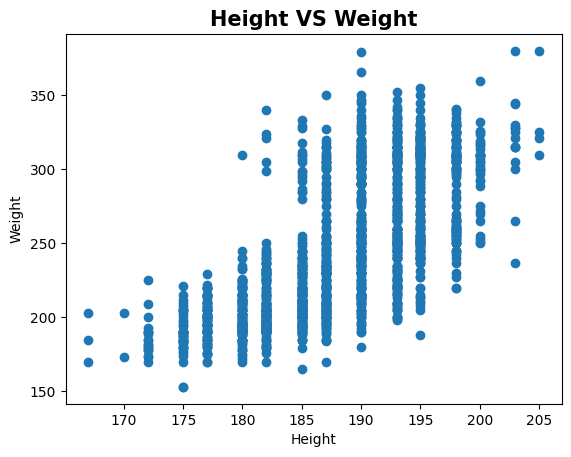

In [13]:
#Plot scatter 

plt.scatter(nflplayers['height_in_cm'], nflplayers['weight'])  

plt.xlabel('Height')

plt.ylabel('Weight')

plt.title('Height VS Weight', fontsize = 15, weight = 'bold')

plt.show()

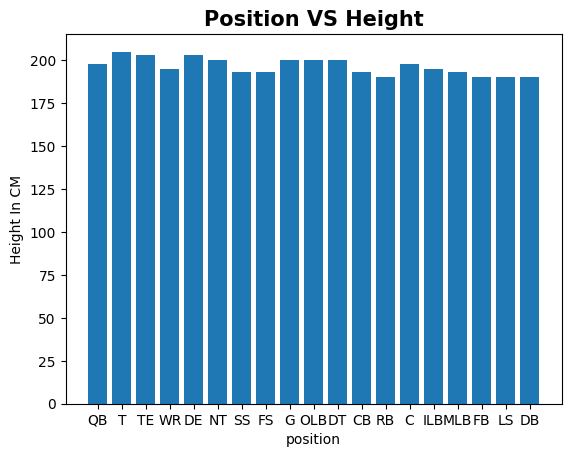

In [14]:
# Plot Bar

plt.bar(nflplayers['position'], nflplayers['height_in_cm'])

plt.xlabel('position')

plt.ylabel('Height In CM')

plt.title('Position VS Height', fontsize = 15, weight = 'bold')

plt.show()

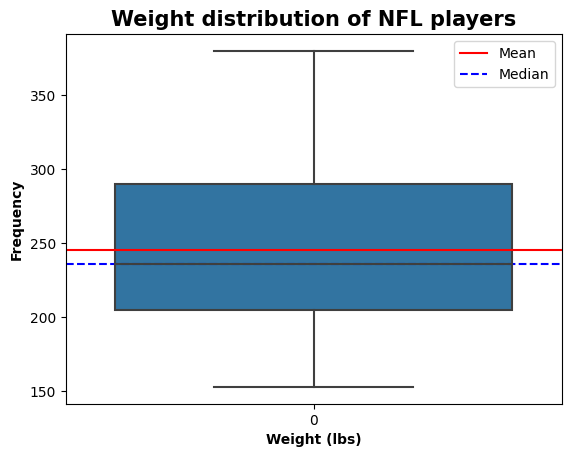

In [15]:
#Plot Box

sns.boxplot(nflplayers['weight'])

plt.axhline(nflplayers['weight'].mean(), color='red',linestyle='-', label = 'Mean')

plt.axhline(nflplayers['weight'].median(), color='blue', linestyle='--', label = 'Median')

plt.xlabel('Weight (lbs)', fontsize = 10, weight='bold')

plt.ylabel('Frequency', fontsize = 10, weight='bold')

plt.title('Weight distribution of NFL players', fontsize = 15, weight='bold')

plt.legend(loc='upper right')

plt.show()

In [16]:
# Get the row with the maximum value in the 'weight' column
max_row = nflplayer.loc[nflplayers['weight'].idxmax()]

# Display the 'Name' and 'weight' columns of the row
print(f"The maximum weight is: *{max_row['weight']}*.")


The maximum weight is: *380*.


In [17]:
# Get the rows where the 'weight' column is equal to 380
rows = nflplayer.loc[nflplayers['weight'].eq(380)]

# Display the 'Name' column of the rows
print(f"The following players have a weight of 380: *{', '.join(rows['displayName'].tolist())}*.")

The following players have a weight of 380: *Trenton Brown, Daniel Faalele*.


In [18]:
nflplayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   nflId         1683 non-null   int64         
 1   weight        1683 non-null   int64         
 2   birthDate     1198 non-null   datetime64[ns]
 3   collegeName   1683 non-null   object        
 4   position      1683 non-null   object        
 5   displayName   1683 non-null   object        
 6   height_in_cm  1683 non-null   int64         
 7   player_age    1683 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 105.3+ KB


In [19]:
position_name = 'QB'

def nflposition():
    
    try:
        
        if nflplayers[nflplayers['position'] == position_name].empty:   #Getting the result college name from the nfl dataset
            
            print('Data not found')
        
        else:
            
            nfl_position = nflplayers[nflplayers['position'] == position_name]
            
            scores = nfl_position[['weight', 'position', 'displayName', 'collegeName']]  
            
            print(scores)
            
    except Exception as e:
        
        print('Data not found')
    
nflposition()

      weight position      displayName       collegeName
0        225       QB        Tom Brady          Michigan
2        225       QB    Aaron Rodgers        California
4        217       QB        Matt Ryan    Boston College
5        245       QB       Joe Flacco          Delaware
9        222       QB       Chad Henne          Michigan
...      ...      ...              ...               ...
1462     220       QB    Kenny Pickett        Pittsburgh
1523     215       QB     Malik Willis           Liberty
1566     220       QB     Bailey Zappe  Western Kentucky
1624     221       QB  Skylar Thompson      Kansas State
1631     212       QB      Brock Purdy        Iowa State

[61 rows x 4 columns]


In [20]:
college_name = 'Duke'

def nfl_college_name():
    
    try:
       
        if nflplayers[nflplayers['collegeName'] == college_name].empty:
            
            print('Data not found')
            
        else:
            
            name = nflplayers[nflplayers['collegeName'] == college_name]
            
            nfl_college = name[['collegeName', 'weight', 'position', 'displayName']]  #Getting the result college name from the nfl dataset
            
            print(nfl_college)
            
    except Exception as e:
        
         print('Data not found')

nfl_college_name()

     collegeName  weight position      displayName
208         Duke     312        G  Laken Tomlinson
240         Duke     177       WR  Jamison Crowder
404         Duke     313        G    Lucas Patrick
769         Duke     220       QB     Daniel Jones
1325        Duke     235      OLB      Chris Rumph
1351        Duke     190       CB   Michael Carter
1359        Duke     240       TE        Noah Gray
1387        Duke     265      OLB  Victor Dimukeje
1413        Duke     220       RB     Deon Jackson
1418        Duke     310        T  Devery Hamilton


In [21]:
#Getting the result player data from the nfl dataset
name = 'Tom'

def player_name():
    
    try:
        
        # select rows where Name contains the entered name
        selected_rows = nflplayers[nflplayers['displayName'].str.contains(name)]
                
        # print the resulting dataframe
        if selected_rows.empty:
            
            #Display the result
            print('No player data found')

        else:
    
            print(selected_rows)
        
    except Exception as ex:
        
         #Display the result
         print('No player data found')
            
player_name()

      nflId  weight  birthDate     collegeName position       displayName  \
0     25511     225 1977-08-03        Michigan       QB         Tom Brady   
208   42371     312 1992-02-09            Duke        G   Laken Tomlinson   
270   42721     263 1992-04-22   Texas-El Paso       TE    Eric Tomlinson   
448   44867     318 1994-02-28         Alabama       DT  Dalvin Tomlinson   
905   48011     251 1995-07-01  Boston College       TE     Tommy Sweeney   
980   48680     194 1996-07-29          Bryant       WR       Tom Kennedy   
1297  53512     248        NaT      Notre Dame       TE     Tommy Tremble   
1337  53561     300        NaT      Ohio State       DT      Tommy Togiai   
1358  53590     315        NaT       Miami, O.        T       Tommy Doyle   
1568  54605     295        NaT     Wake Forest        T          Zach Tom   
1657  55032     260        NaT  North Carolina      OLB         Tomon Fox   

      height_in_cm  player_age  
0              193          47  
208      

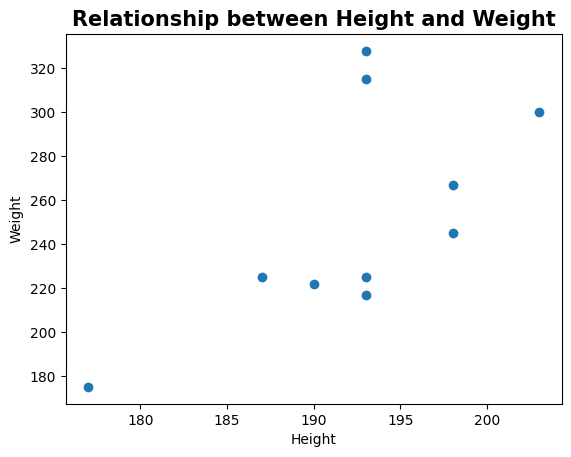

In [22]:
#Plot Scatter

plt.scatter(nflplayers['height_in_cm'].head(10), nflplayers['weight'].head(10))

plt.title('Relationship between Height and Weight', fontsize = 15, weight = 'bold')

plt.xlabel('Height')

plt.ylabel('Weight')

plt.show()

# **Thank You !**